In [56]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pyprind

plt.style.use("ggplot")
%matplotlib inline
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


# Our World In Data

https://github.com/owid/covid-19-data/tree/master/public/data

## Excess mortality

In [2]:
df = pd.read_csv("data/excess_mortality.csv")
df.date = pd.to_datetime(df.date)
df.head()

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,p_proj_0_14,p_proj_15_64,p_proj_65_74,p_proj_75_84,p_proj_85p,cum_excess_per_million_proj_all_ages,excess_per_million_proj_all_ages,deaths_2022_all_ages,deaths_2023_all_ages,deaths_since_2020_all_ages
0,Albania,2020-01-31,-10.65,NaN,NaN,NaN,NaN,2187.0,2447.8,2490.0,...,NaN,NaN,NaN,NaN,NaN,-86.227040,-86.227040,3294.0,2161.0,2187.0
1,Albania,2020-02-29,2.17,NaN,NaN,NaN,NaN,2018.0,1975.2,2139.0,...,NaN,NaN,NaN,NaN,NaN,-66.553880,19.673160,2752.0,1890.0,2018.0
2,Albania,2020-03-31,0.62,NaN,NaN,NaN,NaN,1993.0,1980.8,2051.0,...,NaN,NaN,NaN,NaN,NaN,-57.554455,8.999424,1892.0,1506.0,1993.0
3,Albania,2020-04-30,3.23,NaN,NaN,NaN,NaN,1804.0,1747.6,1906.0,...,NaN,NaN,NaN,NaN,NaN,-33.137410,24.417044,1707.0,1663.0,1804.0
4,Albania,2020-05-31,6.15,NaN,NaN,NaN,NaN,1803.0,1698.6,1709.0,...,NaN,NaN,NaN,NaN,NaN,8.022748,41.160160,1675.0,1680.0,1803.0


In [3]:
df.columns

Index(['location', 'date', 'p_scores_all_ages', 'p_scores_15_64',
       'p_scores_65_74', 'p_scores_75_84', 'p_scores_85plus',
       'deaths_2020_all_ages', 'average_deaths_2015_2019_all_ages',
       'deaths_2015_all_ages', 'deaths_2016_all_ages', 'deaths_2017_all_ages',
       'deaths_2018_all_ages', 'deaths_2019_all_ages', 'deaths_2010_all_ages',
       'deaths_2011_all_ages', 'deaths_2012_all_ages', 'deaths_2013_all_ages',
       'deaths_2014_all_ages', 'deaths_2021_all_ages', 'time', 'time_unit',
       'p_scores_0_14', 'projected_deaths_since_2020_all_ages',
       'excess_proj_all_ages', 'cum_excess_proj_all_ages',
       'cum_proj_deaths_all_ages', 'cum_p_proj_all_ages', 'p_proj_all_ages',
       'p_proj_0_14', 'p_proj_15_64', 'p_proj_65_74', 'p_proj_75_84',
       'p_proj_85p', 'cum_excess_per_million_proj_all_ages',
       'excess_per_million_proj_all_ages', 'deaths_2022_all_ages',
       'deaths_2023_all_ages', 'deaths_since_2020_all_ages'],
      dtype='object')

In [4]:
p_cols = [col for col in df.columns if "p_scores" in col]
death_cols = [
    col for col in df.columns if col.startswith("deaths_") and not "since" in col
]

In [5]:
df_deaths = df[death_cols]
df_deaths.columns = [col.split("_")[1] for col in df_deaths.columns]
df_deaths.head()

,2020,2015,2016,2017,2018,2019,2010,2011,2012,2013,2014,2021,2022,2023
0,2187.0,2490.0,2065.0,3129.0,2158.0,2397.0,NaN,NaN,NaN,NaN,NaN,3002.0,3294.0,2161.0
1,2018.0,2139.0,1905.0,1845.0,2013.0,1974.0,NaN,NaN,NaN,NaN,NaN,3773.0,2752.0,1890.0
2,1993.0,2051.0,1910.0,1817.0,2136.0,1990.0,NaN,NaN,NaN,NaN,NaN,3447.0,1892.0,1506.0
3,1804.0,1906.0,1652.0,1665.0,1828.0,1687.0,NaN,NaN,NaN,NaN,NaN,2419.0,1707.0,1663.0
4,1803.0,1709.0,1716.0,1660.0,1664.0,1744.0,NaN,NaN,NaN,NaN,NaN,1874.0,1675.0,1680.0


In [6]:
df_p = df[p_cols]
df_p.columns = [col[9:] for col in p_cols]
df_p.columns.name = "age"
df_p.index = pd.MultiIndex.from_frame(df[["location", "date"]])
ds_p = df_p.stack().to_xarray()
ds_p.to_netcdf("data/ds_OWID_excess_mortality_p.nc")
ds_p

<xarray.DataArray (location: 129, date: 282, age: 6)>
array([[[-10.65,    nan,    nan,    nan,    nan,    nan],
        [  2.17,    nan,    nan,    nan,    nan,    nan],
        [  0.62,    nan,    nan,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan]],

       [[  3.72,    nan,    nan,    nan,    nan,    nan],
        [  3.51,    nan,    nan,    nan,    nan,    nan],
        [  4.28,    nan,    nan,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan]],

       [[  3.03,    nan,    nan,    nan,    nan,    nan],
        [ 40.15,    nan,    nan,    nan,    nan,    nan],
        [ 29.87,    nan,    nan,    nan,    nan,    nan],
        ...,
...
        ...,
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan]],

       [[ -1.32,    nan,    nan,    nan,    nan,    nan],
        [  6.11,    nan,    nan,    nan,    nan,    nan],
        [  1.48,    nan,    nan,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan]],

       [[  9.4 ,    nan,    nan,    nan,    nan,    nan],
        [  2.44,    nan,    nan,    nan,    nan,    nan],
        [ -6.15,    nan,    nan,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan],
        [   nan,    nan,    nan,    nan,    nan,    nan]]])
Coordinates:
  * location  (location) object 'Albania' 'Algeria' ... 'Uruguay' 'Uzbekistan'
  * date      (date) datetime64[ns] 2020-01-31 2020-02-29 ... 2024-07-31
  * age       (age) object 'all_ages' '15_64' '65_74' '75_84' '85plus' '0_14'

In [7]:
ds_p = xr.load_dataarray("data/ds_OWID_excess_mortality_p.nc")
ds_p.sel(location="Italy")

<xarray.DataArray (date: 282, age: 6)>
array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])
Coordinates:
    location  <U32 'Italy'
  * date      (date) datetime64[ns] 2020-01-31 2020-02-29 ... 2024-07-31
  * age       (age) <U8 'all_ages' '15_64' '65_74' '75_84' '85plus' '0_14'

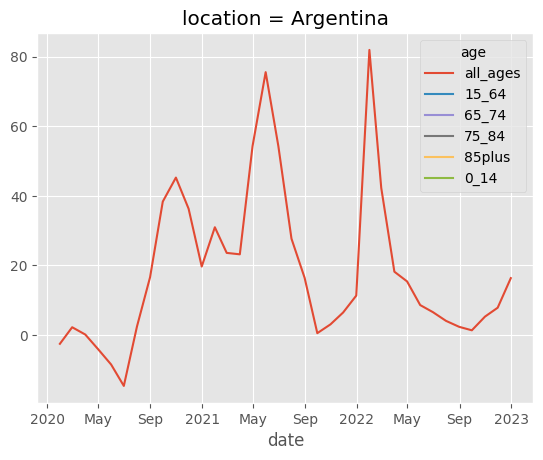

In [18]:
ds_p.sel(location="Argentina").plot(hue="age")

## Vax rollout

In [9]:
df = pd.read_csv("data/vaccinations-by-age-group.csv")
df.date = pd.to_datetime(df.date)
df = df.set_index(["location", "date", "age_group"])
ds = df.to_xarray()
ds = ds.to_netcdf("data/ds_OWID_vax_by_age.nc")
ds

## Graph

In [58]:
ds = xr.load_dataset("data/ds_OWID_vax_by_age.nc")
ds_p = xr.load_dataarray("data/ds_OWID_excess_mortality_p.nc")

In [61]:
country = ds.location.values[0]
print(country)


def plot_correlation(country):
    fig, ax = plt.subplots(2, 1, sharex=True)
    dfp = (
        ds_p.sel(location=country)
        .drop_vars("location")
        .to_dataset("age")
        .to_dataframe()
    )
    dfp = dfp.astype(float)
    dfp = dfp.resample("M").mean()
    dfp.plot(ax=ax[0])
    ax[0].set_title(f"Excess mortality in {country}")

    dfp = (
        ds.sel(location=country)
        .drop_vars("location")
        .resample(date="M")
        .mean()
        .diff("date")
        .to_dataframe()
        .sum(axis=1)
        .unstack(1)
    )
    dfp = dfp.replace(0, np.nan).dropna(axis=1, how="all")
    dfp.plot(ax=ax[1])
    ax[1].set_title(f"Vax rollout in {country}")
    plt.savefig(f"plot/OWID/{country}.png")
    return fig, ax

Argentina


In [62]:
bar = pyprind.ProgBar(len(ds.location.values))

for i, country in enumerate(ds.location.values):
    if country not in ["Jersey"]:
        # print(i, country)
        fig, ax = plot_correlation(country)
        plt.close()
    bar.update()

0% [############################# ] 100% | ETA: 00:00:01

# OWID dataset

In [77]:
df = pd.read_csv("data/owid-covid-data.csv")
df.date = pd.to_datetime(df.date)
df = df.groupby(["location", "date", "median_age"]).mean()
list_col = [col for col in df.columns if "per" in col]
df = df[list_col]
# df = df.index.drop_duplicates(keep="last")
ds = df.to_xarray()
ds

C:\Users\romai\AppData\Local\Temp\ipykernel_17284\880170414.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(["location", "date", "median_age"]).mean()


<xarray.Dataset>
Dimensions:                                     (location: 201, date: 1679,
                                                 median_age: 142)
Coordinates:
  * location                                    (location) object 'Afghanista...
  * date                                        (date) datetime64[ns] 2020-01...
  * median_age                                  (median_age) float64 15.1 ......
Data variables: (12/23)
    total_cases_per_million                     (location, date, median_age) float64 ...
    new_cases_per_million                       (location, date, median_age) float64 ...
    new_cases_smoothed_per_million              (location, date, median_age) float64 ...
    total_deaths_per_million                    (location, date, median_age) float64 ...
    new_deaths_per_million                      (location, date, median_age) float64 ...
    new_deaths_smoothed_per_million             (location, date, median_age) float64 ...
    ...                                          ...
    total_boosters_per_hundred                  (location, date, median_age) float64 ...
    new_vaccinations_smoothed_per_million       (location, date, median_age) float64 ...
    new_people_vaccinated_smoothed_per_hundred  (location, date, median_age) float64 ...
    gdp_per_capita                              (location, date, median_age) float64 ...
    hospital_beds_per_thousand                  (location, date, median_age) float64 ...
    excess_mortality_cumulative_per_million     (location, date, median_age) float64 ...

c:\Users\romai\anaconda3\envs\python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\romai\anaconda3\envs\python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


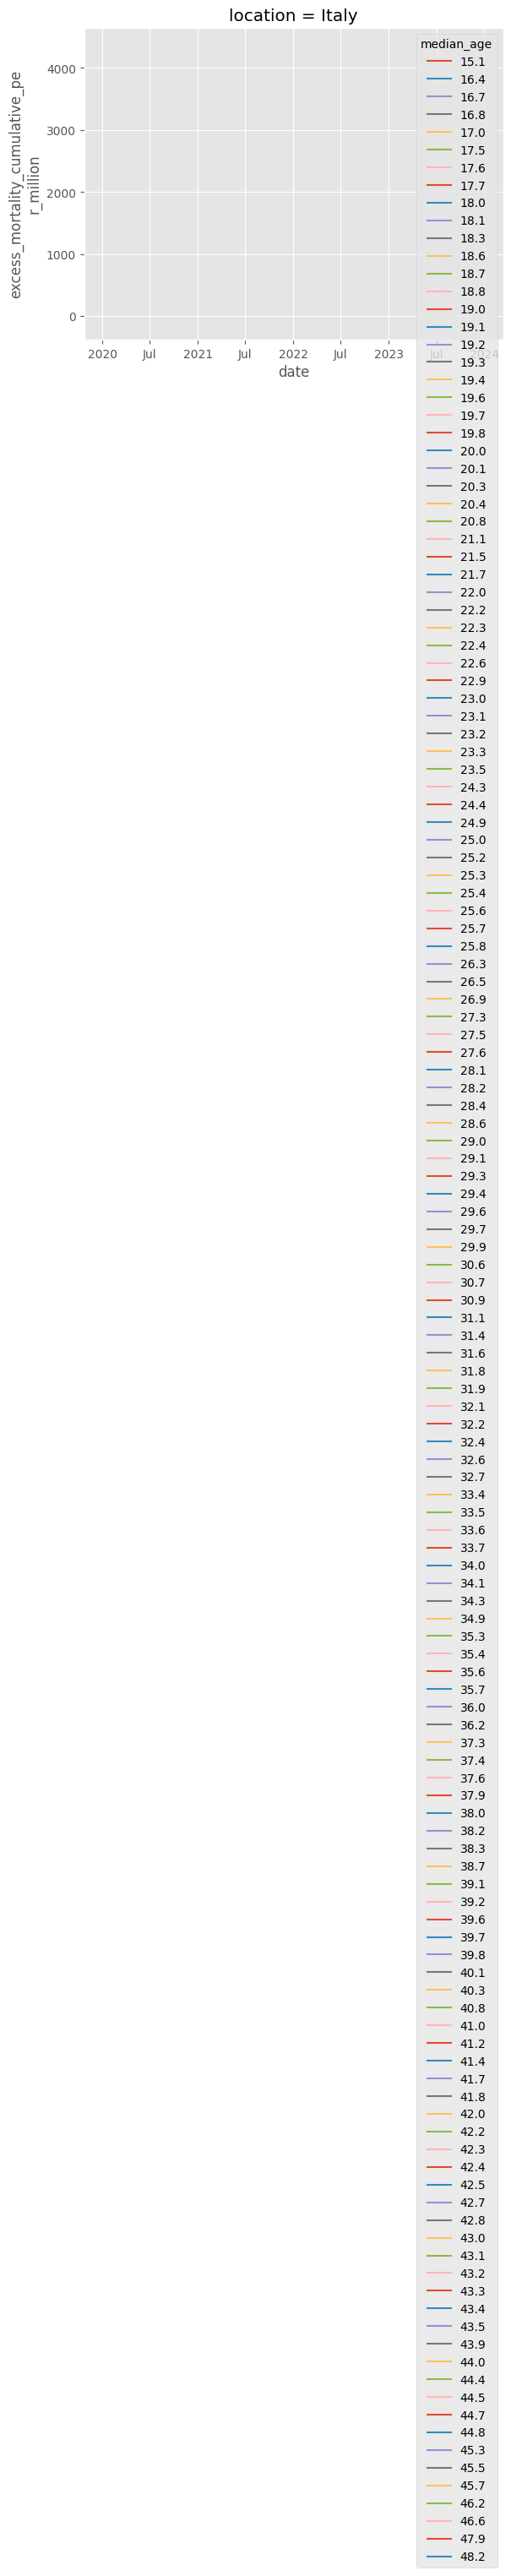

In [78]:
country = "Italy"
ds.excess_mortality_cumulative_per_million.sel(location=country).plot(hue="median_age")

In [79]:
ds.excess_mortality_cumulative_per_million.sel(location=country)

<xarray.DataArray 'excess_mortality_cumulative_per_million' (date: 1679,
                                                             median_age: 142)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    location    <U5 'Italy'
  * date        (date) datetime64[ns] 2020-01-01 2020-01-02 ... 2024-08-05
  * median_age  (median_age) float64 15.1 16.4 16.7 16.8 ... 46.2 46.6 47.9 48.2

In [68]:
df

MultiIndex([('Afghanistan', '2020-01-05', 18.6),
            ('Afghanistan', '2020-01-06', 18.6),
            ('Afghanistan', '2020-01-07', 18.6),
            ('Afghanistan', '2020-01-08', 18.6),
            ('Afghanistan', '2020-01-09', 18.6),
            ('Afghanistan', '2020-01-10', 18.6),
            ('Afghanistan', '2020-01-11', 18.6),
            ('Afghanistan', '2020-01-12', 18.6),
            ('Afghanistan', '2020-01-13', 18.6),
            ('Afghanistan', '2020-01-14', 18.6),
            ...
            (   'Zimbabwe', '2024-07-12', 19.6),
            (   'Zimbabwe', '2024-07-13', 19.6),
            (   'Zimbabwe', '2024-07-14', 19.6),
            (   'Zimbabwe', '2024-07-15', 19.6),
            (   'Zimbabwe', '2024-07-16', 19.6),
            (   'Zimbabwe', '2024-07-17', 19.6),
            (   'Zimbabwe', '2024-07-18', 19.6),
            (   'Zimbabwe', '2024-07-19', 19.6),
            (   'Zimbabwe', '2024-07-20', 19.6),
            (   'Zimbabwe', '2024-07-21', 19.6)],
   

In [66]:
df = pd.read_csv("data/owid-covid-data.csv")
df = df.set_index(["location", "date", "median_age"])
list_col = [col for col in df.columns if "per" in col]
df = df[list_col]
df = df.index.drop_duplicates(keep="last")
ds = df.to_xarray()
ds

ValueError: cannot convert a DataFrame with a non-unique MultiIndex into xarray

In [53]:
df.columns

Index(['iso_code', 'continent', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_pe

In [65]:
df.loc[df[df.index.duplicated()].index[2]]

C:\Users\romai\AppData\Local\Temp\ipykernel_17284\4279818545.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[df[df.index.duplicated()].index[2]]


iso_code continent  total_cases  \
location            date       median_age                                    
European Union (27) 2020-12-06 NaN         OWID_EUN       NaN          NaN   
                               NaN         OWID_EUN       NaN   12145664.0   

                                           new_cases  new_cases_smoothed  \
location            date       median_age                                  
European Union (27) 2020-12-06 NaN               NaN                 NaN   
                               NaN          846481.0          120925.857   

                                           total_deaths  new_deaths  \
location            date       median_age                             
European Union (27) 2020-12-06 NaN                  NaN         NaN   
                               NaN             302489.0     27483.0   

                                           new_deaths_smoothed  \
location            date       median_age                        
European Union (27) 2020-12-06 NaN                         NaN   
                               NaN                    3926.143   

                                           total_cases_per_million  \
location            date       median_age                            
European Union (27) 2020-12-06 NaN                             NaN   
                               NaN                       27126.205   

                                           new_cases_per_million  ...  \
location            date       median_age                         ...   
European Union (27) 2020-12-06 NaN                           NaN  ...   
                               NaN                      1890.536  ...   

                                           male_smokers  \
location            date       median_age                 
European Union (27) 2020-12-06 NaN                  NaN   
                               NaN                  NaN   

                                           handwashing_facilities  \
location            date       median_age                           
European Union (27) 2020-12-06 NaN                            NaN   
                               NaN                            NaN   

                                           hospital_beds_per_thousand  \
location            date       median_age                               
European Union (27) 2020-12-06 NaN                                NaN   
                               NaN                                NaN   

                                           life_expectancy  \
location            date       median_age                    
European Union (27) 2020-12-06 NaN                     NaN   
                               NaN                     NaN   

                                           human_development_index  \
location            date       median_age                            
European Union (27) 2020-12-06 NaN                             NaN   
                               NaN                             NaN   

                                           population  \
location            date       median_age               
European Union (27) 2020-12-06 NaN          450146793   
                               NaN          450146793   

                                           excess_mortality_cumulative_absolute  \
location            date       median_age                                         
European Union (27) 2020-12-06 NaN                                          NaN   
                               NaN                                          NaN   

                                           excess_mortality_cumulative  \
location            date       median_age                                
European Union (27) 2020-12-06 NaN                                 NaN   
                               NaN                                 NaN   

                                           excess_mortality  \
location            date       median_age 

In [59]:
df.loc[df[df.duplicated()].index[0]]

C:\Users\romai\AppData\Local\Temp\ipykernel_17284\3366521222.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[df[df.duplicated()].index[0]]


,,,iso_code,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,date,median_age,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2020-01-06,18.6,AFG,Asia,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [55]:
df.duplicated().mean()

0.07426677276429847

In [52]:
df.head()

iso_code continent  total_cases  new_cases  \
location    date       median_age                                              
Afghanistan 2020-01-05 18.6            AFG      Asia          0.0        0.0   
            2020-01-06 18.6            AFG      Asia          0.0        0.0   
            2020-01-07 18.6            AFG      Asia          0.0        0.0   
            2020-01-08 18.6            AFG      Asia          0.0        0.0   
            2020-01-09 18.6            AFG      Asia          0.0        0.0   

                                   new_cases_smoothed  total_deaths  \
location    date       median_age                                     
Afghanistan 2020-01-05 18.6                       NaN           0.0   
            2020-01-06 18.6                       NaN           0.0   
            2020-01-07 18.6                       NaN           0.0   
            2020-01-08 18.6                       NaN           0.0   
            2020-01-09 18.6                       NaN           0.0   

                                   new_deaths  new_deaths_smoothed  \
location    date       median_age                                    
Afghanistan 2020-01-05 18.6               0.0                  NaN   
            2020-01-06 18.6               0.0                  NaN   
            2020-01-07 18.6               0.0                  NaN   
            2020-01-08 18.6               0.0                  NaN   
            2020-01-09 18.6               0.0                  NaN   

                                   total_cases_per_million  \
location    date       median_age                            
Afghanistan 2020-01-05 18.6                            0.0   
            2020-01-06 18.6                            0.0   
            2020-01-07 18.6                            0.0   
            2020-01-08 18.6                            0.0   
            2020-01-09 18.6                            0.0   

                                   new_cases_per_million  ...  male_smokers  \
location    date       median_age                         ...                 
Afghanistan 2020-01-05 18.6                          0.0  ...           NaN   
            2020-01-06 18.6                          0.0  ...           NaN   
            2020-01-07 18.6                          0.0  ...           NaN   
            2020-01-08 18.6                          0.0  ...           NaN   
            2020-01-09 18.6                          0.0  ...           NaN   

                                   handwashing_facilities  \
location    date       median_age                           
Afghanistan 2020-01-05 18.6                        37.746   
            2020-01-06 18.6                        37.746   
            2020-01-07 18.6                        37.746   
            2020-01-08 18.6                        37.746   
            2020-01-09 18.6                        37.746   

                                   hospital_beds_per_thousand  \
location    date       median_age                               
Afghanistan 2020-01-05 18.6                               0.5   
            2020-01-06 18.6                               0.5   
            2020-01-07 18.6                               0.5   
            2020-01-08 18.6                               0.5   
            2020-01-09 18.6                               0.5   

                                   life_expectancy  human_development_index  \
location    date       median_age                                             
Afghanistan 2020-01-05 18.6                  64.83                    0.511   
            2020-01-06 18.6                  64.83                    0.511   
            2020-01-07 18.6                  64.83                    0.511   
            2020-01-08 18.6                  64.83                    0.511   
            2020-01-09 18.6                  64.83                    0.511   

                                   population  \
location

In [48]:
df = df.set_index(["location", "date", "median_age"])
list_col = [col for col in df.columns if "per" in col]
df = df[list_col]
ds = df.to_xarray()
ds

KeyError: "None of ['location', 'date', 'median_age'] are in the columns"

In [44]:
[col for col in df.columns if "age" in col]

['median_age', 'aged_65_older', 'aged_70_older']

In [43]:
list_col = [col for col in df.columns if "per" in col]

['total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'icu_patients_per_million',
 'hosp_patients_per_million',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions_per_million',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed_per_hundred',
 'gdp_per_capita',
 'hospital_beds_per_thousand',
 'excess_mortality_cumulative_per_million']

In [3]:
file = list_file[0]
file

'DAP(7).xlsx'

In [4]:
df = pd.read_excel('data/eudra/'+file)
df

,The number of individual cases identified in EudraVigilance for,Unnamed: 1,Unnamed: 2
0,"COVID-19 VACCINE JANSSEN (AD26.COV2.S) is 38,...",NaN,NaN
1,Number of individual cases by Age Group,NaN,NaN
2,Age Group,Cases,%
3,Not Specified,3164.0,0.081787
4,0-1 Month,4.0,0.000103
5,2 Months - 2 Years,8.0,0.000207
6,3-11 Years,3.0,0.000078
7,12-17 Years,68.0,0.001758
8,18-64 Years,32612.0,0.842992
9,65-85 Years,2567.0,0.066355
